# Section 1 - The leaky-integrate and fire (LIF) model and python basics

## Section 1.1. --- -

In order to write programs, we need a few basics: 

We will program our scripts in python, a very versatile and widely used programming language. 
To execute the written programs we need a <i>python interpreter</i>. Google colab allows us to run an instance in the cloud, without the need to install anything locally on the computer. 




While learning the basics of python, we want to look at an example model taught in the lecture. The leaky integrate and fire (LIF) model. 
<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/imgs/neuron_to_circuit.png" width="750"/>
</div>

From the lecture we know that we can describe the change of the membrane potential with the following equation:

\begin{equation}
\tau_m\,\frac{dV}{dt} = - V + E_{L} + R_m\,I_e
\end{equation}

We ignore the injected external current for now ($I_e = 0$) which means the equation simplifies to 
\begin{equation}
\tau_m\,\frac{dV}{dt} = - V + E_{L} \qquad (1)
\end{equation}

in this equation we have three parameters, let's define them. 

#### Task - Execute the cell below
When executing a cell, the python interpreter will run the code we provide.

When you select the cell and either press 'Run' at the top of the page or press 'shift+Enter' on the keyboard.

In [2]:
tau_m = 20 # in ms
v = -50 # in mV
el = -60 # in mV
print (tau_m, v, el)

20 -50 -60


#### What happend
1) We assigned values (on the right side of the equal sign) to three distinct variables (on the left of the equal sign).

2) In addition, we can comment the code by using the # symbol. Everything in the same line behind this symbol will be ignored when the code is executed.

3) At the end, we print the values that we just defined

Following equation (1), we can now calculate the change in the membrane voltage per time-step. 

In [35]:
dv_dt = (-v + el)/tau_m
print (dv_dt)

-0.5


This means the membrane potential changes by -0.5mV per ms if the membrane potential is at -50 mV. 

After applying this change (adding -0.5mV/ms * 1ms to -50mV), we can ask again what the change is, then apply this again and so on

In [39]:
dt = 1 # in ms
v = -50 # in mV
dv_dt = (-v + el)/tau_m
print ('dv/dt', dv_dt)
v = v + dv_dt * dt
print ('v', v)
dv_dt = (-v + el)/tau_m
print ('dv/dt', dv_dt)
v = v + dv_dt * dt
print ('v', v)

dv/dt -0.5
v -50.5
dv/dt -0.475
v -50.975


#### What happend

1) We defined a new variable

2) We made sure that our variable defined above (v) is still at -50

3) calculating the instantaneous change in v

4) printing the calculated value, while also printing what the value is

5) setting v equal to its old value plus the change it experiences multiplied with our chosen timestep

6) printing v (and printing that we print v)

7) we repeat the steps 3) to 6)

Now thinking about even more repeats of these steps leads us to a very fundamental concept of programming: 

## Loops
More specifically, the for-loop.
Loops allow us to execute the same code multiple times. We can re-write the above code with a for-loop.

#### Task - Run the cell below, then change the number of repetitions

Initially we execute the code block from above (2 times). You can change how often it will be repeated by changing the number in the 'range' function. Try it out.

In [21]:
dt = 1 # in ms
v = -50 # in mV

for ii in range(2):
    dv_dt = (-v + el)/tau_m
    print ('dv/dt', dv_dt)
    v = v + dv_dt * dt
    print ('v', v)

dv/dt -0.5
v -50.5
dv/dt -0.475
v -50.975


#### What happend

You just executed a for-loop. The most simple syntax of a for-loop is the following:
```python
    for iteration_variable in values_to_iterate_through:
        # do something
```

It is important to note that we see an indentation after we defined our for-loop (and ended the line with a colon)

Everything that is indented will be executed within the loop. 
You can try it out above by removing the indent for the last line. v will then be printed only when the loop is done.

Ususally, people use four or two spaces as the indentation level (or pressing TAB).


We now use the for loop to run our code from above many times and look at the final value of v

#### Task - Change the starting values

When executing the cell below, you can now change the starting value of v. 

However, you should see that (given we have enough repetitions), your final v should always be very close to the same value. Can you explain why this is correct?

In [27]:
v = -55 # in mV

for ii in range(1000):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt

print ('final v', v)

final v -59.99999999999993 -3.552713678800501e-15


Until now we defined how v should evolve over time and we can see what the final v is. Ultimately, we are also interested in the values of v between the beginning and the end. Therefore, we want to save the values of v. This leads us to another variable type.

## Lists

Lists can store multiple varibales of the same, or even of different types. A list is defined like this
```python
    example_list = [1,2,3]
    empty_list = []
```
We can append elements to this list with 
```python
    empty_list.append(1)
```

#### Task - save all intermediate values of v

can you re-write the code from above, so that we do not only print the final v but a list of all v's after the loop has finsihed?

In [32]:
v = -55 # in mV
v_list = []

## TODO: move everything below into a solution file
for ii in range(10):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt
    v_list.append(v) 

print (v_list)

[-55.25, -55.4875, -55.713125, -55.927468749999996, -56.131095312499994, -56.32454054687499, -56.50831351953124, -56.68289784355468, -56.848752951376945, -57.006315303808094]


We now have run a simple simulation and saved the values. To get a better understanding of what is happening, we want to visualize the data. 

## Plots

To visualize with python, we make use of a library. Libraries provide pre-written functions, so that we don't have to rewrite them. To import a library we have to add the following line (usually always at the beginning of the code)
```python
    import matplotlib.pyplot as plt
```
with this line we can import the library matplotlib.pyplot and we can call it from then on with the the name plt 

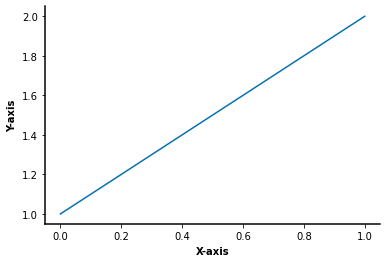

In [48]:
import matplotlib.pyplot as plt

plt.figure()
x = [0,1]
y = [1,2]
plt.plot(x,y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()